# San Francisco Rental Prices Dashboard

In this notebook, you will compile the visualizations from the previous analysis into functions that can be used for a Panel dashboard.

In [17]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas                        # make sure this import is done after panel extension. 
import matplotlib.pyplot as plt
import os
from pathlib import Path
from dotenv import load_dotenv

In [18]:
# Read the Mapbox API key
load_dotenv('john.ev')
map_box_api = os.getenv('map_box_api')
px.set_mapbox_access_token(map_box_api)

# Import Data

In [19]:
# Import the necessary CSVs to Pandas DataFrames
# YOUR CODE HERE!

sfo_data = pd.read_csv(Path('sfo_neighborhoods_census_data.csv'))
sfo_data.head()

,year,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,2010,Alamo Square,291.182945,372560,1239
1,2010,Anza Vista,267.932583,372560,1239
2,2010,Bayview,170.098665,372560,1239
3,2010,Buena Vista Park,347.394919,372560,1239
4,2010,Central Richmond,319.027623,372560,1239


In [20]:
# Minor data cleaning
sfo_data_1 = sfo_data.copy()
sfo_data_1.reset_index()
sfo_data_1.head()

,year,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,2010,Alamo Square,291.182945,372560,1239
1,2010,Anza Vista,267.932583,372560,1239
2,2010,Bayview,170.098665,372560,1239
3,2010,Buena Vista Park,347.394919,372560,1239
4,2010,Central Richmond,319.027623,372560,1239


In [21]:
# Import coordinates data provided
coordinates_data = pd.read_csv(Path('neighborhoods_coordinates.csv')) 
coordinates_data.head()

,Neighborhood,Lat,Lon
0,Alamo Square,37.791012,-122.402100
1,Anza Vista,37.779598,-122.443451
2,Bayview,37.734670,-122.401060
3,Bayview Heights,37.728740,-122.410980
4,Bernal Heights,37.728630,-122.443050


In [ ]:
# CODER'S NOTE: I need to define visual specific DataFrames outside their functions.
# The problem is that many of these different visual functions are drawing from the same DataFrame. If I define the DataFrame within the function. The next will error because it's not defined.
# I need the following DataFrames to be global so various functions can use them, 

In [22]:
# Grouping sfo data by neighborhood to get averages. 
grouped_sfo_data = sfo_data_1.groupby('neighborhood').mean()
grouped_sfo_data.reset_index(inplace=True)
grouped_sfo_data.head()

,neighborhood,year,sale_price_sqr_foot,housing_units,gross_rent
0,Alamo Square,2013.000000,366.020712,378401.0,2817.285714
1,Anza Vista,2013.333333,373.382198,379050.0,3031.833333
2,Bayview,2012.000000,204.588623,376454.0,2318.400000
3,Bayview Heights,2015.000000,590.792839,382295.0,3739.000000
4,Bernal Heights,2013.500000,576.746488,379374.5,3080.333333


In [23]:
# This dataframe is used for various visuals in many functions. Need to make this global so all functions work, and dashboard can run. 
prices_by_neighborhood = sfo_data_1.groupby(['year', 'neighborhood']).mean()
prices_by_neighborhood.reset_index(inplace=True)
prices_by_neighborhood.head()

,year,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,2010,Alamo Square,291.182945,372560,1239
1,2010,Anza Vista,267.932583,372560,1239
2,2010,Bayview,170.098665,372560,1239
3,2010,Buena Vista Park,347.394919,372560,1239
4,2010,Central Richmond,319.027623,372560,1239


In [33]:
# This dataframe is used in more than 1 function. Keeping global so it can be used in all code without kicking an error. 
sfo_top_10 = sfo_data_1.groupby('neighborhood').mean()                           
sfo_top_10.sort_values('sale_price_sqr_foot', ascending=False, inplace=True)     
sfo_top_10.reset_index(inplace=True)

In [34]:
sfo_expensive_neighborhoods_per_year = prices_by_neighborhood[prices_by_neighborhood["neighborhood"].isin(sfo_top_10["neighborhood"])]

- - -

## Panel Visualizations

In this section, you will copy the code for each plot type from your analysis notebook and place it into separate functions that Panel can use to create panes for the dashboard. 

These functions will convert the plot object to a Panel pane.

Be sure to include any DataFrame transformation/manipulation code required along with the plotting code.

Return a Panel pane object from each function that can be used to build the dashboard.

Note: Remove any `.show()` lines from the code. We want to return the plots instead of showing them. The Panel dashboard will then display the plots.

In [25]:
# Define Panel Visualization Functions
def housing_units_per_year():
    """Housing Units Per Year."""
    
    # YOUR CODE HERE!
    
    # Define a DataFrame
    housing_units_per_year = sfo_data_1['housing_units'].groupby('year').mean()
    
    # Create a simple bar graph and assign to a variable.
    units = housing_units_per_year.plot(kind='bar', ylim=(370000,390000), title='Housing Units in San Francisco from 2010 to 2016')
    
    return units   # return

def average_gross_rent():
    """Average Gross Rent in San Francisco Per Year."""
    
    # YOUR CODE HERE!
    
    # We defined the core dataframe for this visual in our import. We'll just create an hvplot object and assign to a variable to return to the dashboard.
    
    rent = prices_by_neighborhood['gross_rent'].hvplot.line(               
        title='Average Monthly Gross Rent by Neighborhood, 2010-2016 - San Francisco',
        xlabel='Year',
        ylabel='Avg Monthly Gross Rent',
        groupby='neighborhood',                 # display an interactive dropdown to change graph visual based on neighborhood.
        c = 'purple'                            # line will be in purple.
    )
    return rent 
    
def average_sales_price():
    """Average Sales Price Per Year."""
    
    # YOUR CODE HERE!
    
    # We defined the core dataframe for this visual in our import. We'll just create an hvplot object and assign to a variable to return to the dashboard.
    
    sales = prices_by_neighborhood['sale_price_sqr_foot'].hvplot.line(                                                
        title='Average Sale Price per Square Foot by Neighborhood, 2010-2016 - San Francisco',
        xlabel='Year',
        ylabel='Avg Sale Price per Square Foot',
        groupby='neighborhood',                     # display an interactive dropdown to change graph visual based on neighborhood. 
        c='red'                                     # line will be in red.
    )
    return sales 

# CODER'S NOTE: This next section is not needed per coder. Redundant. 

#def average_price_by_neighborhood():

# CODER'S NOTE: I am not understanding what this function is wanting. We already have a visual on average sale price per neighborhood that we define in average_sales_price() function,
# I reviewed the rental analyis notebook and nothing matches up with the description. So I'm leaving this off my dashboard.
# This was causing issues, so I decided to leave it off my dashboard.

#   """Average Prices by Neighborhood."""
    
    # YOUR CODE HERE!


def top_most_expensive_neighborhoods():
    """Top 10 Most Expensive Neighborhoods."""

    # YOUR CODE HERE!
    
    # Make a DataFrame for top 10 most expensive neighborhoods
    sfo_top_10 = sfo_data_1.groupby('neighborhood').mean()                           
    sfo_top_10.sort_values('sale_price_sqr_foot', ascending=False, inplace=True)     
    sfo_top_10.reset_index(inplace=True)
    
    top_ten = sfo_top_10.hvplot.bar(
        x='neighborhood',
        y='sale_price_sqr_foot',
        title='Top 10 Expensive Neighborhoods in SFO',
        xlabel='Neighborhood',
        ylabel='Avg. Sale Price per Square Foot',
        height=400,
        rot=90,                   
        alpha=.2                   
    )
    return top_ten

def most_expensive_neighborhoods_rent_sales():
    """Comparison of Rent and Sales Prices of Most Expensive Neighborhoods."""   
    
    # YOUR CODE HERE!
    comparison = prices_by_neighborhood.hvplot.bar(
        'year',                                                                # year will be our outer x-axis
        ['gross_rent', 'sale_price_sqr_foot'],                                 # passing a list of columns will make 2 bar graphs along axis.
        title='Yearly Rent vs Sale Price Per Neighborhood in San Francisco',   # this output is not getting the top 10 expensive neighborhoods. it's just displaying each rent vs sales price per neighborhood thru dropdown selector.
        xlabel='Neighborhood',
        ylabel='Num Housing Units',
        groupby='neighborhood',                                                #groupby will insert a dropdown selector and change the values accordingly. 
        height=500,
        rot=90
    )                                           
    return comparison 
    
def parallel_coordinates():
    """Parallel Coordinates Plot."""

    # YOUR CODE HERE!
    
    coordinates_object = px.parallel_coordinates(
        sfo_expensive_neighborhoods_per_year,
        color='sale_price_sqr_foot'                          # color visual legend bar based on sale_price_sqr_foot column, use color extremes for values. Yellow is most 
    )
    return coordinates_object


def parallel_categories():
    """Parallel Categories Plot."""
    
    # YOUR CODE HERE!
    categories_object = px.parallel_categories(     
        sfo_expensive_neighborhoods_per_year,                            # pass df first                                               
        color='sale_price_sqr_foot',                                     # set color to sold column to categorize
        color_continuous_scale = px.colors.sequential.Inferno,           # category color scheme
    )
    return categories_object

def neighborhood_map():
    """Neighborhood Map."""

    # YOUR CODE HERE!
    
    # Create DataFrame for mapping data.
    sfo_neighborhoods_mapping_data = pd.concat(                                                       # we use pd.concat to concatenate.
    [grouped_sfo_data, coordinates_data],                                                             # pass in our grouped mean dataframe, and coordinates dataframe
    axis=1                             
    ).dropna().reset_index()                                                                          # drop nulls and reset index for cleanup measures.
    sfo_neighborhoods_mapping_data.drop(columns=['index', 'Neighborhood'], inplace=True)              # dropping some duplicated and useless columns 
        
    # Create a scatter mapbox object with 
    sfo_neighborhoods_map = px.scatter_mapbox(
        sfo_neighborhoods_mapping_data,                     # pass in our concatenated data
        lat='Lat',                                          # all px.scatter_mapbox params need to be a valid column name 
        lon='Lon',
        size='sale_price_sqr_foot',                         # set this to sale_price_sqr_foot column. The bigger the value, the bigger the circle.                
        color='gross_rent',                                 # distingiuish the map by gross rent column.
        color_continuous_scale=px.colors.cyclical.IceFire,  # set a color scheme for our circles. 
        size_max=15,                                        # max_size can only go between 0-20
        zoom=15,                                            # zoom can only go between 0-20
        hover_name='neighborhood',                          # this will cause the name of the neighborhood to appeart in BOLD when you interact with the map plots. 
        title='Average Rent vs Sale Price Per Neighborhood - San Francisco'
    )
    return sfo_neighborhoods_map                            # return the mapping object to the dashboard. 

def sunburst():
    """Sunburst Plot."""
    
    # YOUR CODE HERE!
    sfo_sun = px.sunburst(
        sfo_expensive_neighborhoods_per_year,
        path=["year", "neighborhood"],                                                           # we will have the data layered. with year 
        values='sale_price_sqr_foot',
        color='gross_rent',                                                                      # color param will be legend visual using color extremes for the values of gross rent
        color_continuous_scale = 'RdBu',
        title="Gross Rent of Most Expensive neighborhoods in San Francisco 2010-2016",
        height=700,
        hover_data=['neighborhood']
    )
    return sfo_sun    

## Panel Dashboard

In this section, you will combine all of the plots into a single dashboard view using Panel. Be creative with your dashboard design!

In [36]:
# CODER'S NOTE: In building the dashboard compared to what the Solutions file is showing. I decided to make various panel rows and Columns that will call on the functions and store object. 

# Create a Title for the Dashboard
# YOUR CODE HERE!
greeting = pn.pane.Markdown(
    '''# San Franscisco Yearly Neighborhood Cost Analysis - 2010 thu 2016'''
) 

description = pn.pane.Markdown(
    '''This is my dashboard project that will detail the cost analysis of neighborhoods in the San Franscisco area in terms of rent cost per month and sales volumes by square feet that span the window of 2010-2016.'''
)

welcome_column = pn.Column(
    greeting,
    description
)

# CODER'S NOTE: for the rest of the dashbaord I created panel rows and or colum objects to do function calls to build our interactive visuals for the dashboard.

# Create panel columns or rows for each visual object that will be displayed in the dashboard

# CODER'S NOTE: I'm running into problems with this visual, so I'm commenting out for now. Just so the rest of the dashboard code can run. 

#rent_sales_dropdown_row = pn.Row(                                       # we create a panel Row object
#    '## Rent and Sales by Neighborhood',
#    average_gross_rent(),                                               # This row object will 2 visuals we can interact with. 
#    average_sales_price()
#)

categories_coordinates_row = pn.Row(                                     # we create another panel Row
    '## Categorical Data on Neighborhoods',
    parallel_categories(),                                               # we do function calls to get visual objects to return and display in dashboard. 
    parallel_coordinates()
)

comparison_column = pn.Column(                                             # we create a panel Column object.
    '## Comparing Rent Cost to Sales Price per Neighborhood',             
    most_expensive_neighborhoods_rent_sales()                              # call the visual function, and returns the visual object
)

top_ten_column = pn.Column(
    '## Top 10 Expensive San Franscisco Neighborhoods',
    top_most_expensive_neighborhoods()
)

map_column = pn.Column(
    '## San Francisco Area',
    neighborhood_map()
)

sunburst_column = pn.Column(
    '## Sunburst Breakdown of San Franscisco by Year',                                    # header
    sunburst() 
)

# Create the dashboard
# YOUR CODE HERE!

dashboard = pn.Tabs(                                                 # create a pn.Tabs() object for our dashboard
    ('Welcome', welcome_column),                                     # we pass each tab in the dashboard as tuples. and we pass the panel column object 
    #('Rent and Sales Prices', rent_sales_dropdown_row),             # commented out to debug so dashboard can build
    ('Categorical Breakdown of Neighborhoods', categories_coordinates_row),
    ('Rent vs Sales Price', comparison_column),
    ('Top 10 Neighborhoods', top_ten_column),
    ('Area Map', map_column),
    ('Sunburst', sunburst_column)
)
dashboard    # display the dashboard. this dashboard will have 7 tabs that will display interactive visuals for the user. 

Tabs
    [0] Column
        [0] Markdown(str)
        [1] Markdown(str)
    [1] Row
        [0] Markdown(str)
        [1] Plotly(Figure)
        [2] Plotly(Figure)
    [2] Column
        [0] Markdown(str)
        [1] Row
            [0] HoloViews(DynamicMap)
            [1] Column
                [0] WidgetBox
                    [0] Select(margin=(20, 20, 20, 20), name='neighborhood', options=['Alamo Square', ...], value='Alamo Square', width=250)
                [1] VSpacer()
    [3] Column
        [0] Markdown(str)
        [1] HoloViews(Bars)
    [4] Column
        [0] Markdown(str)
        [1] Plotly(Figure)
    [5] Column
        [0] Markdown(str)
        [1] Plotly(Figure)

## Serve the Panel Dashboard

In [38]:
# Serve the# dashboard
# YOUR CODE HERE!
dashboard.servable()            # .servable() flag function is what helps bokeh publish to an online server. Just this won't publish it online. It marks this line as the final code to publish.

# YOU NEED TO USE GIT BASH TO PUBLISH TO A BOKEH SERVER, pass your jupyter notebook that has a line of code that included the .servable() flag. 
# You need to be in the parent directory hosting this notenook in git bash
# GIT COMMAND: panel serve JAK_dashboard.ipynb --log-level debug --show

# In git bokeh is going to scan through the notebook file and look for the line with the .servable() flag.
# Generate a bokeh web server hosted on your machine. This will not be pushed to the outside internet. 

Tabs
    [0] Column
        [0] Markdown(str)
        [1] Markdown(str)
    [1] Row
        [0] Markdown(str)
        [1] Plotly(Figure, relayout_data={'autosize': True})
        [2] Plotly(Figure, relayout_data={'autosize': True})
    [2] Column
        [0] Markdown(str)
        [1] Row
            [0] HoloViews(DynamicMap)
            [1] Column
                [0] WidgetBox
                    [0] Select(margin=(20, 20, 20, 20), name='neighborhood', options=['Alamo Square', ...], value='Alamo Square', width=250)
                [1] VSpacer()
    [3] Column
        [0] Markdown(str)
        [1] HoloViews(Bars)
    [4] Column
        [0] Markdown(str)
        [1] Plotly(Figure)
    [5] Column
        [0] Markdown(str)
        [1] Plotly(Figure)

In [ ]:
# CODER'S NOTE: Panel dashboard should work, but sometimes I am getting bokeh server port in use (see image)

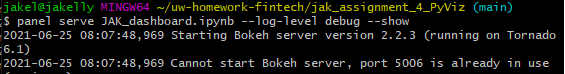

# Debugging

Note: Some of the Plotly express plots may not render in the notebook through the panel functions.

However, you can test each plot by uncommenting the following code

In [ ]:
# housing_units_per_year()

In [ ]:
# average_gross_rent()

In [ ]:
# average_sales_price()

In [ ]:
# average_price_by_neighborhood()

In [ ]:
# top_most_expensive_neighborhoods()

In [ ]:
# most_expensive_neighborhoods_rent_sales()

In [ ]:
# neighborhood_map().show()

In [ ]:
# parallel_categories()

In [ ]:
# parallel_coordinates()

In [ ]:
# sunburst()